In [103]:
import numpy as np
import pandas as pd

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# library used to load local files of MNIST
from mlxtend.data import loadlocal_mnist

# Scikit libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# **1. Load the MNIST DataSet Locally**

In [104]:
# load images and labels of training data
X_training, y_training = loadlocal_mnist(
            images_path='train-images.idx3-ubyte', 
            labels_path='train-labels.idx1-ubyte')

# load images and labels of test data
X_testing, y_testing = loadlocal_mnist(
            images_path='t10k-images.idx3-ubyte', 
            labels_path='t10k-labels.idx1-ubyte')

I used other variables to load the data so that i can use orignal data for further testing If required later on.

In [105]:
# assigned them to variables which will be easily used in the code
# Training set
X_train = X_training
y_train = y_training

# test set
X_test = X_testing
y_test = y_testing

In [106]:
print("Training Data Shape (X): ",X_train.shape)
print("Training Data Shape (Y): ",y_train.shape)
print("Training Data Shape (X): ",X_test.shape)
print("Training Data Shape (Y): ",y_test.shape)

Training Data Shape (X):  (60000, 784)
Training Data Shape (Y):  (60000,)
Training Data Shape (X):  (10000, 784)
Training Data Shape (Y):  (10000,)


### Display Graphically

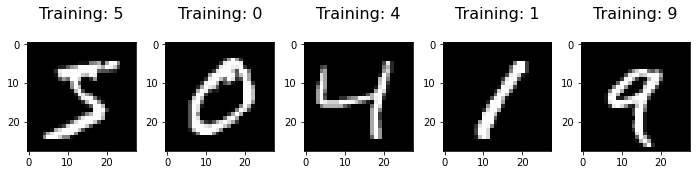

In [107]:
# variables to hold the training data
image = X_train
label = y_train

'''
to generate the plot, first we have to generate each square pixel which is represented
by tuples in a list. aproximately 784 squares each represented by a tuple.
each list is reshaped into a 28 x 28 shape, displaying the image in greyscale
the subplot creates 5 empty plots to display 5 image graphs.
'''
plt.figure(figsize=(12,2))
for index, (image, label) in enumerate(zip(image[0:5], label[0:5])):
    plt.subplot(1, 5, index + 1)
    
    # the shape is 28 X 28
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 16)

# **2. Split the data into Training, Validation and Test Set**

In [108]:
# The data assigned to variables
X_data = X_train
Y_data = y_train

Now to split the data into Train, Validation and Test sets (Already Given)

In [109]:
# The test set has been given already
X_test, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [110]:
# Train and validation set
valid_ratio = 0.166666 # 10 000
X_train, X_valid, y_train, y_valid = train_test_split(X_data, Y_data, 
                           test_size=valid_ratio)

In [111]:
print("Training Set: ",X_train.shape)
print("Validation Set: ",X_valid.shape)
print("Testing Set: ",X_test.shape)

Training Set:  (50000, 784)
Validation Set:  (10000, 784)
Testing Set:  (10000, 784)


### Check the data
Taking a look at the data, we can see that the data is not uniform. So we need to normalize the data, preferably between 0 and 1 to get a better representation of the data. Since this is a grey scale image we can divide the values by 255. (0,0,255 = #FFFFFF which is black). Here we have values from 0 to 255 indicating the intensities of grey.

In [112]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### process data for machine learning
So we can define a function to divide the values by 255 and use the map() function to make the changes, as well as use tensorflow cast function to cast the values to float to make sure we can have decimal points (0 - 1)

In [113]:
# To install tensorflow uncomment the next line
# !pip install tensorflow
import tensorflow as tf

In [114]:
'''
This function normalizes the values by scalling it to a particular range.
In this case 0 - 1.
It takes each value and divides it by 255 and saves it as a float. 0/255 will still be zero
but the rest 1 - 255 will be between 0 and 1. this will scale the data to a set of normalized values.
'''
def scale(image_data):
    image_data = tf.cast(image_data, tf.float64)
    image_data /= 255.  # tells the computer the result must be a float
    return np.array(image_data)

In [115]:
# Normalized Data
X_train = scale(X_train)
X_valid = scale(X_valid)
X_test = scale(X_test)

# **3. Machine learning**
Choose two machine learning algorithms among the ones discussed in the
previous Tasks, and explain why you chose them

### **3.1 Algorithm Choices**

#### 3.1.1. Model 1 - Logistic Regression
=============================<br>
- The dataset has classifications by categories (0 - 9)
- Commonly used model due to its speed and reliability

#### 3.1.2. Parameters
**Parameter**: solver, max_iter
<br>**Reason**: solver increased performance, and max_iter was running short (took 3 mins to run)

**Value to set**: solver='lbfgs', max_iter=50000
<br>**Reason**: The above values where used to remedy the performance of the model and range

#### 3.2.1. Model 2 - Random Forest
=========================<br>
- Reduces overfitting
- imporves accuracy
- works well with categorical data

#### 3.2.2. Parameters
**Parameter**: n_estimators, n_jobs, criterion
<br>**Reason**: n_estimators sets the amount of trees in the forest, n_jobs specifies number of cores, ciriterion selects either gini or entropy method

**Value to set**: n_estimators = 100, n_jobs = 3, criterion='entropy'
<br>**Reason**: n_estimators at 100 gives a better model accuracy, n_jobs at 3 cores speeds up processing, ciriterion entropy method gives a higher accuracy

# **4. Generation of The Models**

## **Model 1 - Logistic Regression**

In [116]:
# create instance of the model
logisticReg = LogisticRegression(solver='lbfgs', max_iter=50000)

# Train the model for every X value to respective Y value
logisticReg.fit(X_train, y_train )

LogisticRegression(max_iter=50000)

#### Predictions

In [117]:
# predictions made on the test set first image
logisticReg.predict(X_test[0].reshape(1,-1))

array([7], dtype=uint8)

In [118]:
# predictions made on all the data in the test set
lr_pred = logisticReg.predict(X_test)

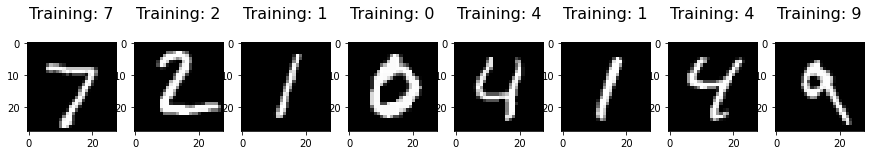

In [119]:
# variables to hold the training data
image = X_test
label = y_test

'''
to generate the plot, first we have to generate each square pixel which is represented
by tuples in a list. aproximately 784 squares each represented by a tuple.
each list is reshaped into a 28 x 28 shape, displaying the image in greyscale
the subplot creates 5 empty plots to display 5 image graphs.
'''
plt.figure(figsize=(15,2))
for index, (image, label) in enumerate(zip(image[0:8], label[0:8])):
    plt.subplot(1, 8, index + 1)
    
    # the shape is 28 X 28
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 16)

#### Confusion Matrix

In [120]:
# generate the confusion matrix and hold it in a variable
# to be used in the seaborn heatmap
lr_cm = confusion_matrix(y_test, lr_pred)

In [121]:
# determine the accuracy score on the test set
lr_score = logisticReg.score(X_test, y_test)

Playing around with the colour palette i accidently came across this one and I am Loving it!!
It highlights the problem areas in the heatmap.

Text(0.5, 1.0, 'Models Accuracy: 0.9249')

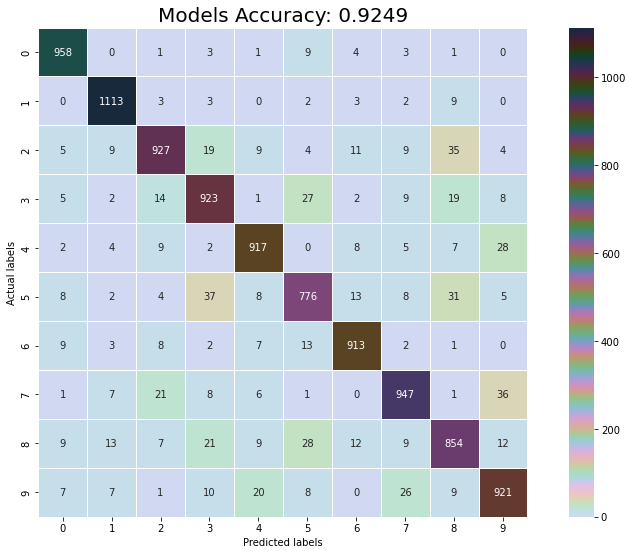

In [122]:
# colour palette argument
color = sns.color_palette("ch:s=-.2,r=20", as_cmap=True)

# generate an empty plot and populate it with a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(lr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = color)

# add axis and title labels 
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
title = 'Models Accuracy: {0}'.format(lr_score)
plt.title(title, size = 20)

#### Classification report - Precision, Recall, f1-score

In [123]:
# Generate a classification report which displays the precision, recall and f1-score
# with the averages and accuracy
print("Classification Report")
print(classification_report(y_test, lr_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.89      0.87      0.88       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## **Model 2 - Random Forest**

In [124]:
# Create instance of our tree by calling the RandomForestClassifier with selected parameters
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', 
                            random_state=7, min_samples_split=2, n_jobs=3)

# train the model on training set data
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=3, random_state=7)

In [125]:
# generate predictions on the test data
rf_pred = logisticReg.predict(X_test)

#### Confusion Matrix

In [126]:
# generate the confusion matrix and hold it in a variable
# to be used in the seaborn heatmap
rf_cm = confusion_matrix(y_test, rf_pred)

In [127]:
# determine the accuracy score on the test set
rf_score = rf.score(X_test, y_test)

Text(0.5, 1.0, 'Accuracy Score: 0.9679')

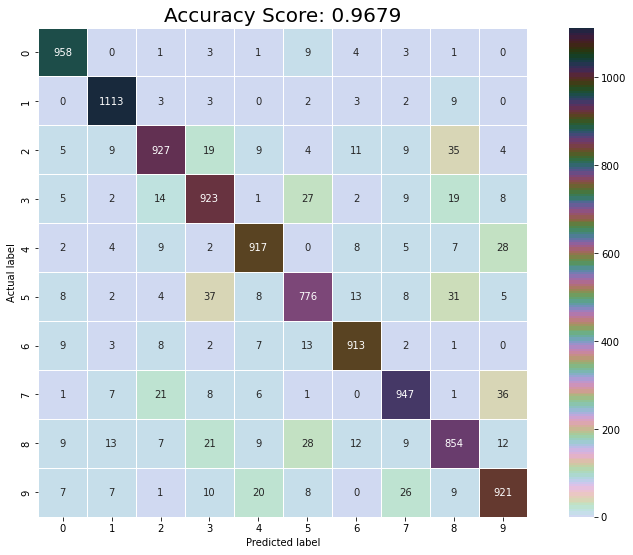

In [128]:
# colour palette argument
color = sns.color_palette("ch:s=-.2,r=20", as_cmap=True)

# generate an empty plot and populate it with a heatmap
plt.figure(figsize=(15,9))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = color)

# add axis and title labels 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(rf_score)
plt.title(title, size = 20)

#### Classification report - Precision, Recall, f1-score

In [129]:
# Generate a classification report which displays the precision, recall and f1-score
# with the averages and accuracy
print("Classification Report")
print(classification_report(y_test, rf_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.89      0.87      0.88       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# **5. Report which classes the models struggle with the most**
I compared the matrices misinterpretation for values above 20 000 for both matrices to have a levelled comparison

#### Model 1 - Logistic regression

This model struggled with distinguishing between the following classes (> 20 K):

- 8, 5 was sometimes recognized as 3
- 9 was sometimes recognized as 4
- 3, 8 was sometimes recognized as 5
- 9 was sometimes recognized as 7
- 5, 2 was sometimes recognized as 8
- 7, 4 was sometimes recognized as 9

#### Model 2 - Random Forest

This model struggled with distinguishing between the following classes (> 20 K):

- 7 was sometimes recognized as 2
- 4 was sometimes recognized as 9

## Comment on the differences in performance and report which model you believe did the best job.

In [130]:
print("Logistic Regression Accuracy:",lr_score)
print("Random Forest Accuracy:",rf_score)

Logistic Regression Accuracy: 0.9249
Random Forest Accuracy: 0.9679


# REFERENCES
Load the MNIST Dataset from Local Files<br>
http://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/

Loading MNIST handwritten digits dataset<br> https://www.renom.jp/notebooks/tutorial/neuralnetwork/download_mnist/notebook.html


How to split data into three sets (train, validation, and test) And why?<br>
https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

MNIST Classification using Random Forest<br>
https://www.kaggle.com/ashwani07/mnist-classification-using-random-forest